<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-взаимодействия-пользователей-с-карточками-Яндекс.Дзен" data-toc-modified-id="Анализ-взаимодействия-пользователей-с-карточками-Яндекс.Дзен-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ взаимодействия пользователей с карточками Яндекс.Дзен</a></span></li><li><span><a href="#Подготовка-csv-файла-с-агрегированными-данными" data-toc-modified-id="Подготовка-csv-файла-с-агрегированными-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка csv файла с агрегированными данными</a></span></li><li><span><a href="#Ссылка-на-дашборд" data-toc-modified-id="Ссылка-на-дашборд-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ссылка на дашборд</a></span></li><li><span><a href="#Дополнительное-исследование-для-презентации" data-toc-modified-id="Дополнительное-исследование-для-презентации-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Дополнительное исследование для презентации</a></span></li><li><span><a href="#Ссылка-на-презентацию" data-toc-modified-id="Ссылка-на-презентацию-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ссылка на презентацию</a></span></li></ul></div>

# Анализ взаимодействия пользователей с карточками Яндекс.Дзен

ЧТЗ на работы:
- Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;
- Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
- Кто будет основным пользователем дашборда: менеджеры по анализу контента;
- Состав данных для дашборда:
  
    - История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
    - Разбивка событий по темам источников;
    - Таблица соответствия тем источников темам карточек;
- По каким параметрам данные должны группироваться:
  
    - Дата и время;
    - Тема карточки;
    - Тема источника;
    - Возрастная группа;
- Характер данных:
  
    - История событий по темам карточек — абсолютные величины с разбивкой по минутам;
    - Разбивка событий по темам источников — относительные величины (% событий);
    - Соответствия тем источников темам карточек - абсолютные величины;
- Важность: все графики имеют равную важность;
- Источники данных для дашборда: агрегирующая таблица `dash_visits`:
  
    - `record_id`  — первичный ключ,
    - `item_topic` — тема карточки,
    - `source_topic` — тема источника,
    - `age_segment` — возрастной сегмент,
    - `dt` — дата и время,
    - `visits` — количество событий.
- Таблица хранится в специально подготовленной базе данных `zen`;
- Частота обновления данных: один раз в сутки, в полночь по UTC;
- Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):

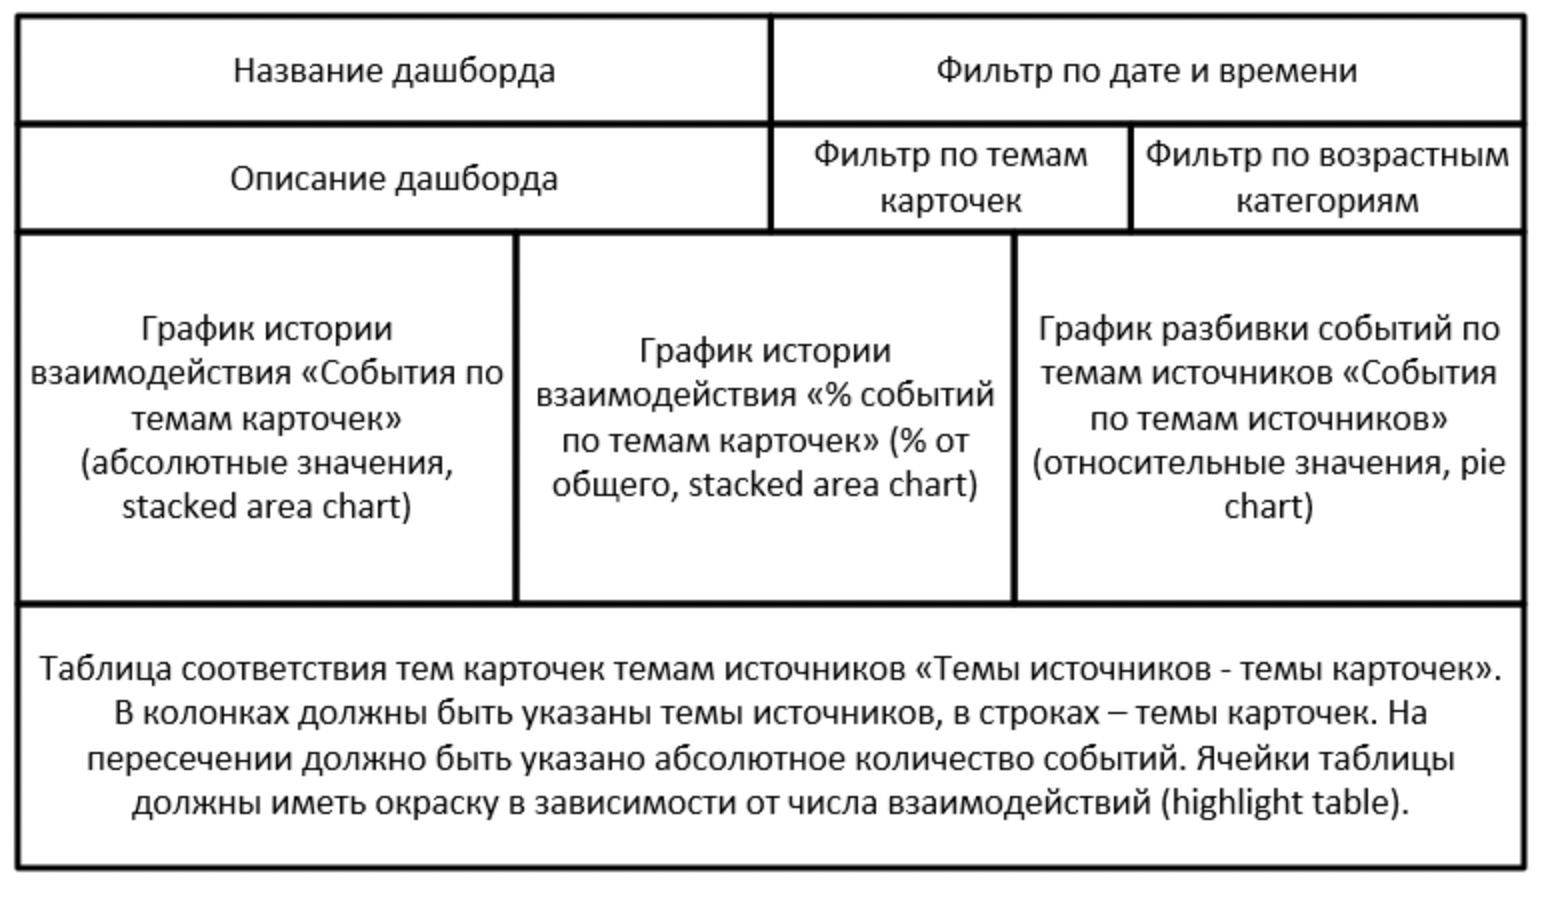

# Подготовка csv файла с агрегированными данными 

In [1]:
# импортируем библиотеки
import pandas as pd

from sqlalchemy import create_engine

In [2]:
# создаем коннект к БД Яндекс Практикума 
db_config = {'user': '...', # имя пользователя
            'pwd': '...', # пароль
            'host': '....yandexcloud.net',
            'port': ..., # порт подключения
            'db': '...'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

In [3]:
# выгружаем данные из БД Яндекса в файл dash_visits.csv 

# сохранем sql-запрос на получение данных в отдельной переменной query  
query = '''
        SELECT * FROM dash_visits
        '''

# сохраняем результаты запроса в отдельной переменной dash_visits 
dash_visits = pd.io.sql.read_sql(query, con = engine)

# сохранеям выгруженные данные в отдельный файл dash_visits.csv
dash_visits.to_csv('dash_visits.csv', index = False)

In [4]:
# посмотрим на первые 10 строк датасета
dash_visits.head(10)


,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
5,1040602,Деньги,Авто,18-25,2019-09-24 18:57:00,22
6,1040603,Деньги,Авто,18-25,2019-09-24 18:58:00,24
7,1040604,Деньги,Авто,18-25,2019-09-24 18:59:00,20
8,1040605,Деньги,Авто,18-25,2019-09-24 19:00:00,5
9,1040606,Деньги,Авто,26-30,2019-09-24 18:29:00,1


Агрегирующая таблица `dash_visits` содержит следующие данные:
  
- `record_id`  — первичный ключ,
- `item_topic` — тема карточки,
- `source_topic` — тема источника,
- `age_segment` — возрастной сегмент,
- `dt` — дата и время,
- `visits` — количество событий.

In [5]:
# получим общую информацию о датасете 
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


Подготовленная инженерами таблица с агрегирующими данными содержит 30 745 строк. Пропусков в данных нет. Типы данных соответсвуют содержащихся в них значениях. Таблица применима для построения дашборда 

# Ссылка на дашборд


https://public.tableau.com/app/profile/natalia7606/viz/dash_visits_16744824226710/DashVisitsZen?publish=yes

# Дополнительное исследование для презентации 


In [6]:
# получим минимальное и максимальное значение даты, за которую получен срез данных 
print("Minimal date research -", dash_visits['dt'].min())
print("Maximum date research -", dash_visits['dt'].max())

Minimal date research - 2019-09-24 18:28:00
Maximum date research - 2019-09-24 19:00:00


In [7]:
# посмотрим уникальные темы карточек 
print('List of unique Item topic - ',
     dash_visits['item_topic'].unique(),
     '\nCount -', len(dash_visits['item_topic'].unique()))

# посмотрим уникальные темы источников 
print('\nList of unique Item source - ',
     dash_visits['source_topic'].unique(),
     '\nCount -', len(dash_visits['source_topic'].unique()))

List of unique Item topic -  ['Деньги' 'Дети' 'Женская психология' 'Женщины' 'Здоровье' 'Знаменитости'
 'Интересные факты' 'Искусство' 'История' 'Красота' 'Культура' 'Наука'
 'Общество' 'Отношения' 'Подборки' 'Полезные советы' 'Психология'
 'Путешествия' 'Рассказы' 'Россия' 'Семья' 'Скандалы' 'Туризм' 'Шоу'
 'Юмор'] 
Count - 25

List of unique Item source -  ['Авто' 'Деньги' 'Дети' 'Еда' 'Здоровье' 'Знаменитости' 'Интерьеры'
 'Искусство' 'История' 'Кино' 'Музыка' 'Одежда' 'Полезные советы'
 'Политика' 'Психология' 'Путешествия' 'Ремонт' 'Россия' 'Сад и дача'
 'Сделай сам' 'Семейные отношения' 'Семья' 'Спорт' 'Строительство'
 'Технологии' 'Финансы'] 
Count - 26


In [8]:
# посмотрим общее количество визитов, содержащееся в датасете 
print('Total of visits -', dash_visits['visits'].sum())

Total of visits - 310207


In [9]:
# посмотрим размер интервала времени, который попал в исследование 
print(dash_visits['dt'].max() - dash_visits['dt'].min())

0 days 00:32:00


# Ссылка на презентацию


https://disk.yandex.ru/d/w50Ssgal6TmHnw